In [1]:
from pandarallel import pandarallel

# Initialization
pandarallel.initialize(use_memory_fs=False)

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from ast import literal_eval

In [3]:
protein_relations = pd.read_csv('./similar_protein_sequences.csv')
protein_relations.dropna(inplace=True)

In [4]:
protein_relations['protein_lists'] = protein_relations.protein_sequence.parallel_apply(lambda x: literal_eval(x))

/mnt/d/Users/dhdzm/Documents/projects/Novozymes/venv/lib/python3.8/site-packages/pandarallel/data_types/series.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  yield data[chunk_]


In [5]:
protein_lists = protein_relations.drop('protein_sequence', axis=1)
protein_lists_exploded = protein_lists.set_index('seq_id').protein_lists.explode().reset_index()

In [6]:
protein_lists_exploded.head()

,seq_id,protein_lists
0,0,1SR8
1,1,1WI9
2,2,6JZB
3,2,6PSI
4,2,4J80


In [7]:
from networkx.algorithms import bipartite

In [8]:
seq_id_nodes = list(protein_lists_exploded.seq_id.unique())
protein_nodes = list(protein_lists_exploded.protein_lists.unique())

In [9]:
edges = list(protein_lists_exploded.itertuples(index=False, name=None))

In [10]:
G = nx.Graph()

In [11]:
G.add_nodes_from(seq_id_nodes, bipartite=0)
G.add_nodes_from(protein_nodes, bipartite=1)
G.add_edges_from(edges)


In [12]:
degrees = bipartite.degrees(G, nodes=seq_id_nodes)

In [13]:
degree_dict = dict(degrees[0])
#degree_dict = dict(degrees[1])

In [16]:
degree_df = pd.DataFrame(
    pd.Series(degree_dict)
)

In [17]:
degree_df.sort_values(0, ascending=False).head(20)

,0
6K42,930
7EVY,928
7EVZ,928
7EW0,928
7EW7,928
6VMS,927
6K41,924
7S0G,923
7S0F,923
8DCR,915


In [18]:
connected_components = sorted(nx.connected_components(G), key=len, reverse=True)

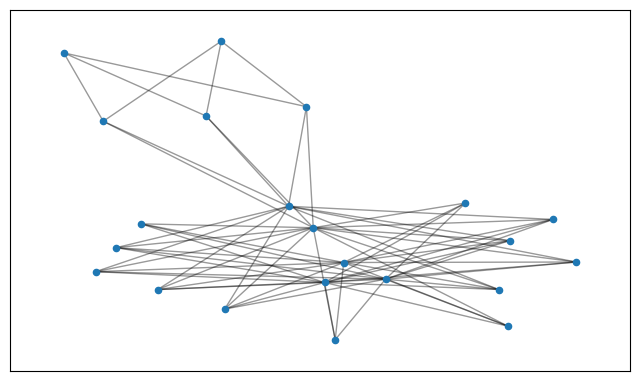

In [19]:
subgraph = G.subgraph(connected_components[300])

fig = plt.figure("Degree of a random graph", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])

pos = nx.spring_layout(subgraph, seed=10396953)
nx.draw_networkx_nodes(subgraph, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(subgraph, pos, ax=ax0, alpha=0.4)

In [20]:
connected_components[300]

{15349,
 23237,
 23270,
 23283,
 '2NPI',
 4278,
 '4C0B',
 '4C0H',
 '4OHV',
 '4OHW',
 '4OHX',
 '4OHY',
 '4OHZ',
 '4OI0',
 '4OI1',
 '4OI2',
 '4OI4',
 '6OF2',
 '6OF3',
 '6OF4',
 7122,
 8179}

In [21]:
c = bipartite.color(subgraph)
nx.set_node_attributes(subgraph, c, "bipartite")


In [22]:
subgraph.nodes

NodeView(('4OHX', '2NPI', '4OI4', '4OHZ', '4OI2', 4278, '4OHW', '6OF2', 23237, '4C0B', '4OI1', 7122, '4OHY', '6OF3', '6OF4', '4OI0', '4C0H', 23270, 23283, 8179, 15349, '4OHV'))

In [23]:
titles, protein_seq = nx.bipartite.sets(subgraph)

In [25]:
adj_matrix = nx.bipartite.biadjacency_matrix(
    subgraph, row_order=list(protein_seq)
)

/tmp/ipykernel_32324/4019060206.py:1: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  adj_matrix = nx.bipartite.biadjacency_matrix(


<AxesSubplot: >

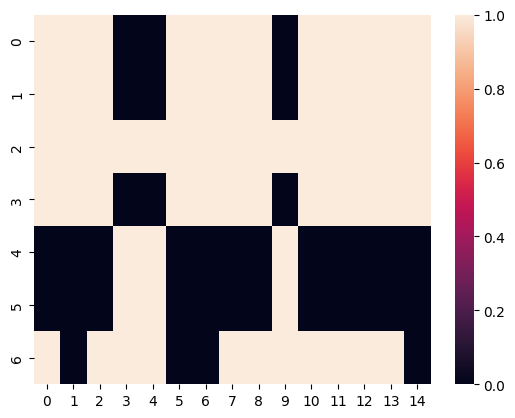

In [30]:
sns.heatmap(adj_matrix.toarray())

In [29]:
import seaborn as sns

In [33]:
projected_g = nx.bipartite.projected_graph(
    subgraph, list(protein_seq)
)

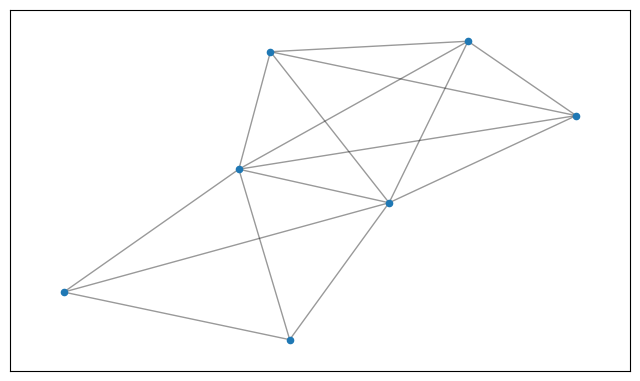

In [34]:

fig = plt.figure("Degree of a random graph", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])

pos = nx.spring_layout(projected_g, seed=10396953)
nx.draw_networkx_nodes(projected_g, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(projected_g, pos, ax=ax0, alpha=0.4)

In [ ]:
biggest_subgraph = G.subgraph(connected_components[0])
titles, protein_seq = nx.bipartite.sets(biggest_subgraph)
projected_g = nx.bipartite.projected_graph(
    biggest_subgraph, list(protein_seq)
)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])

pos = nx.spring_layout(projected_g, seed=10396953)
nx.draw_networkx_nodes(projected_g, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(projected_g, pos, ax=ax0, alpha=0.4)